# Simulation of Ideal Populations in Each Country

> - As we have done on our data preparation, here will be how each country will likely achieve their ideal population in the next 5 years.
> - It's shown how much is the gap, and how they should control birth & fertility rate based on the death rate prediction for the next 5 years.
> - Some country would not achieve the ideal populations only in 5 years, countries with big population and small area should control the birth for more than 5 years.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')

## Inserting Final Dataset

In [2]:
df = pd.read_csv('Data-Combination-KaliIniLolos.csv')
df.head()

,Country,2_code,3_code,region,sub-region,Land Area(Km2),economy,Pop-YR2002,Pop-YR2021,Life-YR2002,...,Fer-YR2002,Fer-YR2021,Death-YR2002,Death-YR2021,Birth-YR2002,Birth-YR2021,Pop_Gro-YR2002,Pop_Gro-YR2021,Med_Age-YR2002,Med_Age-YR2021
0,Afghanistan,AF,AFG,Asia,Southern Asia,652230,AFG,21000256,40099462,56.454,...,7.339,4.643,11.280,7.344,48.201,35.842,6.449321,2.851358,14.0,16.7
1,Albania,AL,ALB,Europe,Southern Europe,28748,ALB,3051010,2811666,75.890,...,2.036,1.390,5.953,11.325,15.209,10.240,-0.299877,-0.926918,27.3,37.3
2,Algeria,DZ,DZA,Africa,Northern Africa,2381741,DZA,31624696,44177969,71.230,...,2.456,2.889,4.932,4.546,19.421,21.524,1.348867,1.657703,21.7,27.8
3,Andorra,AD,AND,Europe,Southern Europe,468,AND,70849,79034,0.000,...,0.000,0.000,0.000,0.000,11.200,0.000,4.369372,1.702288,36.8,42.5
4,Angola,AO,AGO,Africa,Sub-Saharan Africa,1246700,AGO,17516139,34503774,47.386,...,6.567,5.304,17.275,8.009,47.448,38.809,3.335132,3.166030,15.7,16.2


## Feature Engineering

<function matplotlib.pyplot.show(close=None, block=None)>

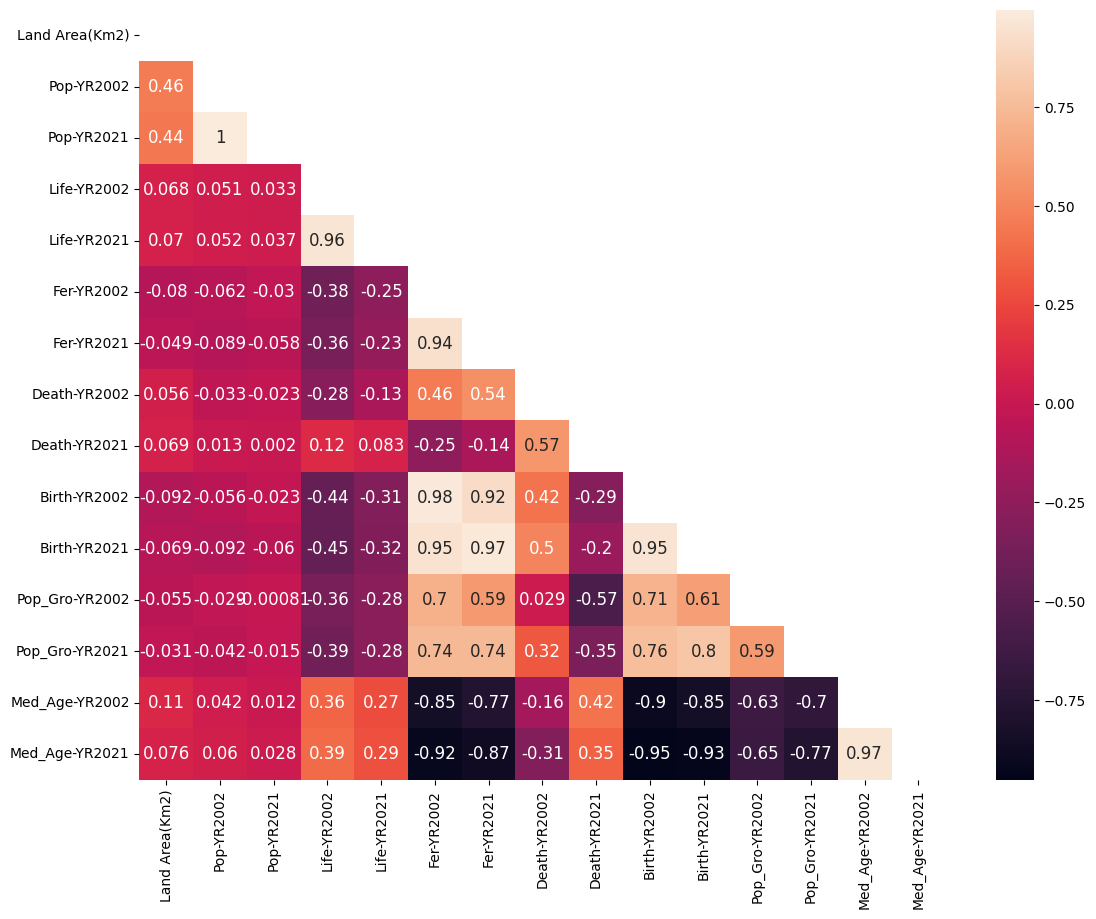

In [3]:
df_corr = df.corr()

plt.figure(figsize=(13,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12}, mask=np.triu(df_corr))

plt.show

In [4]:
df['density(Km2)_YR2002']=df['Pop-YR2002']/df['Land Area(Km2)']
df['density(Km2)_YR2021']=df['Pop-YR2021']/df['Land Area(Km2)']

In [5]:
df['Ideal_Population']=75*df['Land Area(Km2)']

In [6]:
df['Gap_from_ideal'] = df['Ideal_Population'] - df['Pop-YR2021']

In [7]:
df['Target Total Birth/yr']=df['Gap_from_ideal']/5

In [8]:
df['Target Pop 2022']=df['Pop-YR2021']+df['Target Total Birth/yr']
df['Target Pop 2023']=df['Target Pop 2022']+df['Target Total Birth/yr']
df['Target Pop 2024']=df['Target Pop 2023']+df['Target Total Birth/yr']
df['Target Pop 2025']=df['Target Pop 2024']+df['Target Total Birth/yr']

In [9]:
df.head()

,Country,2_code,3_code,region,sub-region,Land Area(Km2),economy,Pop-YR2002,Pop-YR2021,Life-YR2002,...,Med_Age-YR2021,density(Km2)_YR2002,density(Km2)_YR2021,Ideal_Population,Gap_from_ideal,Target Total Birth/yr,Target Pop 2022,Target Pop 2023,Target Pop 2024,Target Pop 2025
0,Afghanistan,AF,AFG,Asia,Southern Asia,652230,AFG,21000256,40099462,56.454,...,16.7,32.197624,61.480554,48917250,8817788,1763557.6,41863019.6,43626577.2,45390134.8,47153692.4
1,Albania,AL,ALB,Europe,Southern Europe,28748,ALB,3051010,2811666,75.890,...,37.3,106.129470,97.803882,2156100,-655566,-131113.2,2680552.8,2549439.6,2418326.4,2287213.2
2,Algeria,DZ,DZA,Africa,Northern Africa,2381741,DZA,31624696,44177969,71.230,...,27.8,13.277974,18.548603,178630575,134452606,26890521.2,71068490.2,97959011.4,124849532.6,151740053.8
3,Andorra,AD,AND,Europe,Southern Europe,468,AND,70849,79034,0.000,...,42.5,151.386752,168.876068,35100,-43934,-8786.8,70247.2,61460.4,52673.6,43886.8
4,Angola,AO,AGO,Africa,Sub-Saharan Africa,1246700,AGO,17516139,34503774,47.386,...,16.2,14.050003,27.676084,93502500,58998726,11799745.2,46303519.2,58103264.4,69903009.6,81702754.8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                194 non-null    object 
 1   2_code                 193 non-null    object 
 2   3_code                 194 non-null    object 
 3   region                 194 non-null    object 
 4   sub-region             194 non-null    object 
 5   Land Area(Km2)         194 non-null    int64  
 6   economy                194 non-null    object 
 7   Pop-YR2002             194 non-null    int64  
 8   Pop-YR2021             194 non-null    int64  
 9   Life-YR2002            194 non-null    float64
 10  Life-YR2021            194 non-null    float64
 11  Fer-YR2002             194 non-null    float64
 12  Fer-YR2021             194 non-null    float64
 13  Death-YR2002           194 non-null    float64
 14  Death-YR2021           194 non-null    float64
 15  Birth-

In [11]:
columns_to_drop = [col for col in df.columns if '2002' in col]
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.drop(columns = 'economy', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                194 non-null    object 
 1   2_code                 193 non-null    object 
 2   3_code                 194 non-null    object 
 3   region                 194 non-null    object 
 4   sub-region             194 non-null    object 
 5   Land Area(Km2)         194 non-null    int64  
 6   Pop-YR2021             194 non-null    int64  
 7   Life-YR2021            194 non-null    float64
 8   Fer-YR2021             194 non-null    float64
 9   Death-YR2021           194 non-null    float64
 10  Birth-YR2021           194 non-null    float64
 11  Pop_Gro-YR2021         194 non-null    float64
 12  Med_Age-YR2021         194 non-null    float64
 13  density(Km2)_YR2021    194 non-null    float64
 14  Ideal_Population       194 non-null    int64  
 15  Gap_fr

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                194 non-null    object 
 1   2_code                 193 non-null    object 
 2   3_code                 194 non-null    object 
 3   region                 194 non-null    object 
 4   sub-region             194 non-null    object 
 5   Land Area(Km2)         194 non-null    int64  
 6   Pop-YR2021             194 non-null    int64  
 7   Life-YR2021            194 non-null    float64
 8   Fer-YR2021             194 non-null    float64
 9   Death-YR2021           194 non-null    float64
 10  Birth-YR2021           194 non-null    float64
 11  Pop_Gro-YR2021         194 non-null    float64
 12  Med_Age-YR2021         194 non-null    float64
 13  density(Km2)_YR2021    194 non-null    float64
 14  Ideal_Population       194 non-null    int64  
 15  Gap_fr

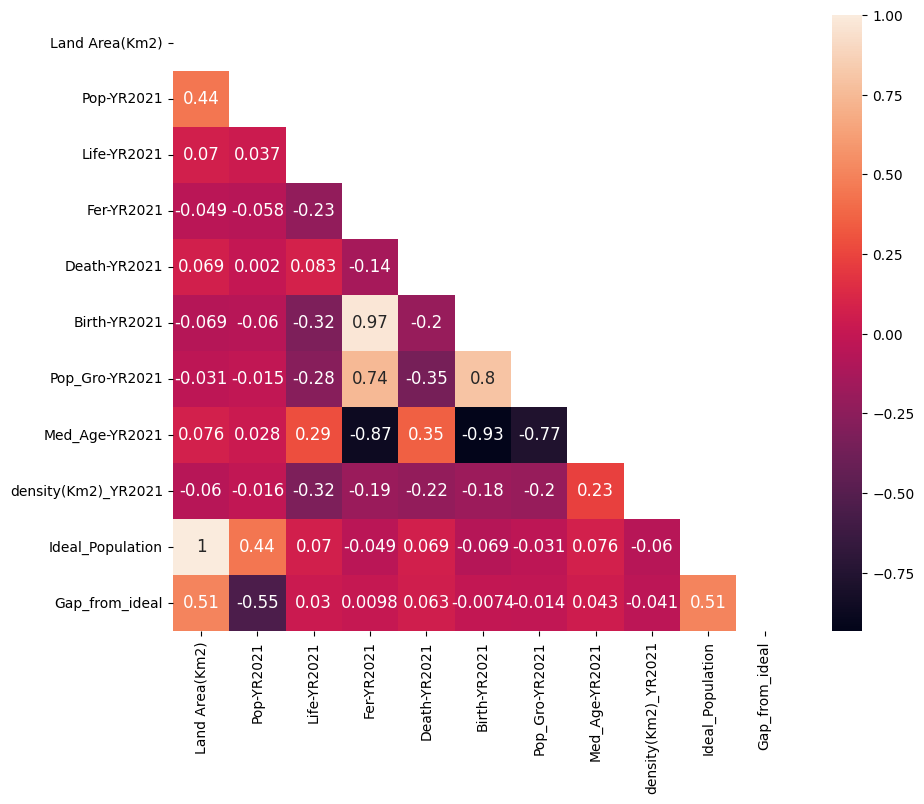

In [23]:
select_column = ['Target Pop 2022', 'Target Pop 2023', 'Target Pop 2024', 'Target Pop 2025', 'Target Total Birth/yr']
df_corr = df.drop(columns=select_column).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 12}, mask=np.triu(df_corr))

plt.show()

## Death rate predictions data

In [30]:
df_death = pd.read_csv('Predict Death.csv')
df_death

,Year,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,...,UZB,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
0,2000-01-01,12.096000,18.287000,5.798000,0.000000,2.107000,7.600000,8.270000,6.587000,6.700000,...,5.500000,7.056000,4.964000,5.755000,5.512000,5.138000,7.940000,10.174,16.876000,16.801000
1,2001-01-01,11.713000,17.789000,5.872000,0.000000,2.047000,7.549000,8.344000,6.305000,6.600000,...,5.300000,6.848000,5.557000,5.769000,5.642000,5.080000,7.565000,10.871,16.145000,19.048000
2,2002-01-01,11.280000,17.275000,5.953000,0.000000,1.987000,7.518000,8.593000,6.072000,6.800000,...,5.400000,6.801000,5.010000,5.800000,5.645000,5.035000,7.203000,11.784,15.292000,16.953000
3,2003-01-01,10.698000,15.804000,6.057000,0.000000,1.661000,7.864000,8.573000,6.142000,6.600000,...,5.300000,6.858000,5.384000,5.812000,5.673000,5.057000,6.898000,12.657,14.320000,17.805000
4,2004-01-01,10.277000,15.151000,6.181000,3.800000,1.613000,7.480000,8.919000,6.075000,6.500000,...,5.000000,6.649000,5.217000,5.835000,5.718000,5.088000,6.662000,12.947,13.450000,16.989000
5,2005-01-01,9.941000,14.497000,6.306000,3.600000,1.563000,7.423000,8.914000,6.015000,6.400000,...,5.400000,6.555000,5.189000,5.865000,5.751000,5.171000,6.413000,13.177,12.659000,16.820000
6,2006-01-01,9.679000,13.943000,6.477000,3.300000,1.449000,7.369000,9.063000,6.077000,6.400000,...,5.300000,6.470000,5.289000,5.927000,5.793000,5.169000,6.208000,13.234,11.933000,16.436000
7,2007-01-01,9.359000,13.133000,6.318000,2.800000,1.229000,7.748000,9.117000,5.914000,6.700000,...,5.100000,6.319000,5.242000,5.966000,5.832000,5.221000,5.954000,12.973,11.351000,16.270000
8,2008-01-01,8.832000,12.478000,6.570000,2.800000,1.011000,7.467000,9.387000,5.813000,6.700000,...,5.100000,6.337000,5.600000,6.066000,5.876000,5.238000,5.770000,12.543,10.670000,15.604000
9,2009-01-01,8.535000,11.788000,6.810000,3.200000,0.867000,7.410000,9.356000,5.727000,6.500000,...,4.800000,6.526000,5.620000,6.117000,5.930000,6.066000,5.651000,11.947,9.961000,14.804000


In [35]:
df_death.reset_index(drop=True, inplace=True)  # Reset the index and drop the old index column
df_death['Year'] = pd.to_datetime(df_death['Year'])  # Convert the "Year" column to datetime if not already

# Now the "Year" column is separate, and the index is reset to defaultdf_death
df_death.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Year to ZWE
dtypes: datetime64[ns](1), float64(194)
memory usage: 41.3 KB


In [36]:
df_death['Year'] = df_death['Year'].dt.year
df_death

,Year,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,...,UZB,VCT,VEN,VNM,VUT,WSM,YEM,ZAF,ZMB,ZWE
0,2000,12.096000,18.287000,5.798000,0.000000,2.107000,7.600000,8.270000,6.587000,6.700000,...,5.500000,7.056000,4.964000,5.755000,5.512000,5.138000,7.940000,10.174,16.876000,16.801000
1,2001,11.713000,17.789000,5.872000,0.000000,2.047000,7.549000,8.344000,6.305000,6.600000,...,5.300000,6.848000,5.557000,5.769000,5.642000,5.080000,7.565000,10.871,16.145000,19.048000
2,2002,11.280000,17.275000,5.953000,0.000000,1.987000,7.518000,8.593000,6.072000,6.800000,...,5.400000,6.801000,5.010000,5.800000,5.645000,5.035000,7.203000,11.784,15.292000,16.953000
3,2003,10.698000,15.804000,6.057000,0.000000,1.661000,7.864000,8.573000,6.142000,6.600000,...,5.300000,6.858000,5.384000,5.812000,5.673000,5.057000,6.898000,12.657,14.320000,17.805000
4,2004,10.277000,15.151000,6.181000,3.800000,1.613000,7.480000,8.919000,6.075000,6.500000,...,5.000000,6.649000,5.217000,5.835000,5.718000,5.088000,6.662000,12.947,13.450000,16.989000
5,2005,9.941000,14.497000,6.306000,3.600000,1.563000,7.423000,8.914000,6.015000,6.400000,...,5.400000,6.555000,5.189000,5.865000,5.751000,5.171000,6.413000,13.177,12.659000,16.820000
6,2006,9.679000,13.943000,6.477000,3.300000,1.449000,7.369000,9.063000,6.077000,6.400000,...,5.300000,6.470000,5.289000,5.927000,5.793000,5.169000,6.208000,13.234,11.933000,16.436000
7,2007,9.359000,13.133000,6.318000,2.800000,1.229000,7.748000,9.117000,5.914000,6.700000,...,5.100000,6.319000,5.242000,5.966000,5.832000,5.221000,5.954000,12.973,11.351000,16.270000
8,2008,8.832000,12.478000,6.570000,2.800000,1.011000,7.467000,9.387000,5.813000,6.700000,...,5.100000,6.337000,5.600000,6.066000,5.876000,5.238000,5.770000,12.543,10.670000,15.604000
9,2009,8.535000,11.788000,6.810000,3.200000,0.867000,7.410000,9.356000,5.727000,6.500000,...,4.800000,6.526000,5.620000,6.117000,5.930000,6.066000,5.651000,11.947,9.961000,14.804000


In [40]:
df_melt = df_death.melt(id_vars=['Year'], var_name='3_code', value_name='Value')

# Pivot the DataFrame to have 'economy' as columns and 'Year' as rows
df_pivot = df_melt.pivot(index='3_code',columns='Year', values='Value')
# Display the pivoted DataFrame


In [41]:
df_pivot

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
3_code,,,,,,,,,,,,,,,,,,,,,
AFG,12.096,11.713,11.280,10.698,10.277,9.941,9.679,9.359,8.832,8.535,...,7.027,6.981,6.791,7.113,7.344,6.903760,6.780521,6.657281,6.534042,6.410802
AGO,18.287,17.789,17.275,15.804,15.151,14.497,13.943,13.133,12.478,11.788,...,8.242,7.990,7.811,7.821,8.009,7.882841,7.582131,7.281421,6.980711,6.680002
ALB,5.798,5.872,5.953,6.057,6.181,6.306,6.477,6.318,6.570,6.810,...,8.150,8.308,8.480,10.785,11.325,8.288317,8.426633,8.564950,8.703267,8.841584
AND,0.000,0.000,0.000,0.000,3.800,3.600,3.300,2.800,2.800,3.200,...,0.000,4.400,3.900,0.000,0.000,1.854275,1.871098,1.887921,1.904744,1.921567
ARE,2.107,2.047,1.987,1.661,1.613,1.563,1.449,1.229,1.011,0.867,...,1.202,1.324,1.471,1.766,1.874,1.288047,1.374094,1.460140,1.546187,1.632234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,5.138,5.080,5.035,5.057,5.088,5.171,5.169,5.221,5.238,6.066,...,5.290,5.297,5.500,5.305,5.343,5.420144,5.437100,5.454057,5.471014,5.487970
YEM,7.940,7.565,7.203,6.898,6.662,6.413,6.208,5.954,5.770,5.651,...,6.082,6.629,6.416,6.509,6.845,6.268688,6.378600,6.488513,6.598425,6.708337
ZAF,10.174,10.871,11.784,12.657,12.947,13.177,13.234,12.973,12.543,11.947,...,8.802,8.765,8.614,9.425,11.432,8.680000,8.558000,8.436000,8.314000,8.192000


In [42]:
df_pivot.to_csv('data_death_final.csv', index=True)

In [45]:
df_dead = pd.read_csv('data_death_final.csv')
df_dead.head()

,3_code,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,AFG,12.096,11.713,11.280,10.698,10.277,9.941,9.679,9.359,8.832,...,7.027,6.981,6.791,7.113,7.344,6.903760,6.780521,6.657281,6.534042,6.410802
1,AGO,18.287,17.789,17.275,15.804,15.151,14.497,13.943,13.133,12.478,...,8.242,7.990,7.811,7.821,8.009,7.882841,7.582131,7.281421,6.980711,6.680002
2,ALB,5.798,5.872,5.953,6.057,6.181,6.306,6.477,6.318,6.570,...,8.150,8.308,8.480,10.785,11.325,8.288317,8.426633,8.564950,8.703267,8.841584
3,AND,0.000,0.000,0.000,0.000,3.800,3.600,3.300,2.800,2.800,...,0.000,4.400,3.900,0.000,0.000,1.854275,1.871098,1.887921,1.904744,1.921567
4,ARE,2.107,2.047,1.987,1.661,1.613,1.563,1.449,1.229,1.011,...,1.202,1.324,1.471,1.766,1.874,1.288047,1.374094,1.460140,1.546187,1.632234


In [46]:
df_dead = df_dead[['3_code','2022', '2023', '2024', '2025', '2026']]
df_dead.head()

,3_code,2022,2023,2024,2025,2026
0,AFG,6.903760,6.780521,6.657281,6.534042,6.410802
1,AGO,7.882841,7.582131,7.281421,6.980711,6.680002
2,ALB,8.288317,8.426633,8.564950,8.703267,8.841584
3,AND,1.854275,1.871098,1.887921,1.904744,1.921567
4,ARE,1.288047,1.374094,1.460140,1.546187,1.632234


In [68]:
df_dead['Total_dead_next_5yrs'] = df_dead[['2022', '2023', '2024', '2025', '2026']].sum(axis=1)
df_dead['Total_dead_next_5yrs'] = (df_dead['Total_dead_next_5yrs']*1000).apply(math.ceil)
df_dead.head()

,3_code,2022,2023,2024,2025,2026,total_dead,Total_dead,Total_dead_next_5yrs
0,AFG,6.903760,6.780521,6.657281,6.534042,6.410802,33.286407,33287,33287
1,AGO,7.882841,7.582131,7.281421,6.980711,6.680002,36.407106,36408,36408
2,ALB,8.288317,8.426633,8.564950,8.703267,8.841584,42.824751,42825,42825
3,AND,1.854275,1.871098,1.887921,1.904744,1.921567,9.439606,9440,9440
4,ARE,1.288047,1.374094,1.460140,1.546187,1.632234,7.300701,7301,7301


In [69]:
df_final = df[['3_code', 'Fer-YR2021', 'Birth-YR2021', 'Gap_from_ideal']].merge(df_dead[['3_code', 'Total_dead_next_5yrs']], on='3_code', how='inner')
df_final

,3_code,Fer-YR2021,Birth-YR2021,Gap_from_ideal,Total_dead_next_5yrs
0,AFG,4.643,35.842,8817788,33287
1,ALB,1.390,10.240,-655566,42825
2,DZA,2.889,21.524,134452606,22003
3,AND,0.000,0.000,-43934,9440
4,AGO,5.304,38.809,58998726,36408
...,...,...,...,...,...
189,VEN,2.211,15.877,40203883,35891
190,VNM,1.944,15.008,-72627279,33892
191,YEM,3.795,30.544,6615959,32443
192,ZMB,4.308,34.511,36973225,32051


## Calculate each Country Target

In [70]:
df_final['Birth_target_next_5yrs'] = df_final['Gap_from_ideal'] + df_final['Total_dead_next_5yrs']
df_final

,3_code,Fer-YR2021,Birth-YR2021,Gap_from_ideal,Total_dead_next_5yrs,Birth_target_next_5yrs
0,AFG,4.643,35.842,8817788,33287,8851075
1,ALB,1.390,10.240,-655566,42825,-612741
2,DZA,2.889,21.524,134452606,22003,134474609
3,AND,0.000,0.000,-43934,9440,-34494
4,AGO,5.304,38.809,58998726,36408,59035134
...,...,...,...,...,...,...
189,VEN,2.211,15.877,40203883,35891,40239774
190,VNM,1.944,15.008,-72627279,33892,-72593387
191,YEM,3.795,30.544,6615959,32443,6648402
192,ZMB,4.308,34.511,36973225,32051,37005276


In [170]:
def success(df_final):
    if df_final['Birth_target_next_5yrs'] > 0:
        return 1
    else:
        return 0
        

df_final['Ideal_Population_Success'] = df_final.apply(success, axis=1)
df_final

,3_code,Fer-YR2021,Birth-YR2021,Gap_from_ideal,Total_dead_next_5yrs,Birth_target_next_5yrs,Ideal_Population_Success,Birth-YR2022_2026
0,AFG,4.643,35.842,8817788,33287,8851075,1,8851.075
1,ALB,1.390,10.240,-655566,42825,-612741,0,-612.741
2,DZA,2.889,21.524,134452606,22003,134474609,1,134474.609
3,AND,0.000,0.000,-43934,9440,-34494,0,-34.494
4,AGO,5.304,38.809,58998726,36408,59035134,1,59035.134
...,...,...,...,...,...,...,...,...
189,VEN,2.211,15.877,40203883,35891,40239774,1,40239.774
190,VNM,1.944,15.008,-72627279,33892,-72593387,0,-72593.387
191,YEM,3.795,30.544,6615959,32443,6648402,1,6648.402
192,ZMB,4.308,34.511,36973225,32051,37005276,1,37005.276


In [178]:
import plotly.express as px


fig = px.bar(df_final,
             x = '3_code',
             y = 'Birth_target_next_5yrs',
             color = 'Birth_target_next_5yrs',
             color_continuous_scale = 'rdpu')

fig.update_layout(title = '<b>Populasi Terluas</b>',
                  title_x = 0.5,
                  title_font = dict(size = 18, color = 'Purple'),
                  yaxis = dict(title = 'Populasi'),
                  xaxis = dict(title = 'Negara', tickangle = 45))

fig.show()

## Fertility Prediction for the Next 5 Years

In [72]:
df_final['Birth-YR2022_2026'] = df_final['Birth_target_next_5yrs'] / 1000
df_final.head()

,3_code,Fer-YR2021,Birth-YR2021,Gap_from_ideal,Total_dead_next_5yrs,Birth_target_next_5yrs,Ideal_Population_Success,Birth-YR2022_2026
0,AFG,4.643,35.842,8817788,33287,8851075,1,8851.075
1,ALB,1.390,10.240,-655566,42825,-612741,0,-612.741
2,DZA,2.889,21.524,134452606,22003,134474609,1,134474.609
3,AND,0.000,0.000,-43934,9440,-34494,0,-34.494
4,AGO,5.304,38.809,58998726,36408,59035134,1,59035.134


In [161]:
df_train = df_final[['Fer-YR2021', 'Birth-YR2021']]
df_predict = df_final[['3_code', 'Birth-YR2022_2026']]

In [148]:
df_predict

0        8851.075
1        -612.741
2      134474.609
3         -34.494
4       59035.134
          ...    
189     40239.774
190    -72593.387
191      6648.402
192     37005.276
193     13350.517
Name: Birth-YR2022_2026, Length: 194, dtype: float64

In [149]:
column_name = 'Fer-YR2021'
hasil = df_train.loc[df_train[column_name] == 0]

hasil

,Fer-YR2021,Birth-YR2021
3,0.0,0.0
114,0.0,0.0
132,0.0,13.4
149,0.0,6.2


In [150]:
indices_to_drop = [3, 114, 132, 149]
df_train = df_train.drop(indices_to_drop)

In [151]:
df_train.head()

,Fer-YR2021,Birth-YR2021
0,4.643,35.842
1,1.390,10.240
2,2.889,21.524
4,5.304,38.809
5,1.580,12.115


In [152]:
X = df_train.drop(['Fer-YR2021'], axis = 1)
y = df_train['Fer-YR2021']

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print('Train size' , X_train.shape)
print('Test size' , X_test.shape)

Train size (152, 1)
Test size (38, 1)


In [139]:
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

In [140]:
model_lin_reg.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred_train = model_lin_reg.predict(X_train)
y_pred_test = model_lin_reg.predict(X_test)
y_pred_train

array([1.63168909, 3.38860824, 2.71830668, 1.48548678, 2.92128532,
       3.20765829, 2.00316099, 1.0291782 , 2.1249744 , 1.27568973,
       3.65531274, 2.04144895, 3.94863524, 1.83938817, 2.19604315,
       2.57826715, 2.74780939, 1.47237446, 3.0010082 , 4.44834558,
       4.06743281, 1.30191436, 3.31386805, 1.60690682, 4.39563407,
       4.4926652 , 1.80018235, 1.13145426, 4.70338011, 1.38058825,
       1.41638488, 2.38079568, 2.86542686, 1.45926215, 2.35378431,
       0.71186017, 1.63300033, 1.90560536, 1.48548678, 3.13449157,
       5.98209312, 1.73475189, 5.72823869, 1.54383658, 1.54842589,
       2.24600107, 1.86600617, 4.61172503, 2.64212412, 5.13189058,
       5.63946831, 1.30191436, 1.05278037, 4.14558221, 1.19701584,
       1.49859909, 4.40389483, 4.86780855, 1.33023696, 4.74284818,
       4.22019129, 3.61676253, 4.11935758, 0.04313208, 1.30191436,
       1.39540517, 2.73207461, 2.26580067, 1.59995729, 1.00033111,
       3.7490658 , 4.56832327, 1.15767889, 1.73239168, 1.54973

In [142]:
from sklearn.metrics import mean_absolute_error

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train set :  0.21879339336558004
Error - Test set :  0.20340072999191716


In [155]:
df_predict

,3_code,Birth-YR2022_2026
0,AFG,8851.075
1,ALB,-612.741
2,DZA,134474.609
3,AND,-34.494
4,AGO,59035.134
...,...,...
189,VEN,40239.774
190,VNM,-72593.387
191,YEM,6648.402
192,ZMB,37005.276


In [163]:
df_predict = df_predict.drop(columns='3_code')

In [164]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Birth-YR2022_2026  194 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [167]:
y_pred = model_lin_reg.predict(df_predict)
df_predict['Fer-YR2022_2026'] = y_pred

In [169]:
df_train

,Fer-YR2021,Birth-YR2021
0,4.643,35.842
1,1.390,10.240
2,2.889,21.524
3,0.000,0.000
4,5.304,38.809
...,...,...
189,2.211,15.877
190,1.944,15.008
191,3.795,30.544
192,4.308,34.511


In [168]:
df_predict

,Birth-YR2022_2026,Fer-YR2022_2026
0,8851.075,1160.624008
1,-612.741,-80.301401
2,134474.609,17632.778076
3,-34.494,-4.479830
4,59035.134,7740.916133
...,...,...
189,40239.774,5276.409239
190,-72593.387,-9518.630773
191,6648.402,871.802575
192,37005.276,4852.291657
